<a href="https://colab.research.google.com/github/Wishmi-Sasika/SLIIT-AI-ML-Stage-2/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

*   **Task**: Predict petrol consumption of a country given various factors such as tax, distance of highways, and population with driving license
*   **Input**: Tax, distance of highways, average income, and population with driving license
*   **Output**: Expected petrol consumption

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/Data/petrol_consumption-220925-152435.csv", encoding = "latin-1")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.shape

(48, 5)

In [7]:
df.describe().round(2).T
              # Rounding all the values into 2 decimal points
                      # Transformation of the metrix

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


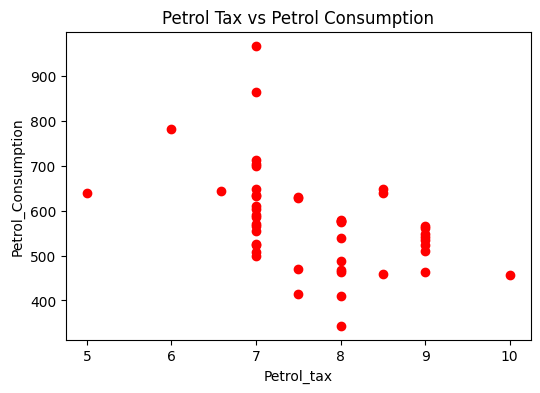

In [8]:
plt.figure (figsize = (6, 4))
plt.plot (df['Petrol_tax'], df['Petrol_Consumption'], 'ro')
plt.title ('Petrol Tax vs Petrol Consumption')
plt.xlabel ('Petrol_tax')
plt.ylabel ('Petrol_Consumption')

plt.show()

# Indentifing Outliers

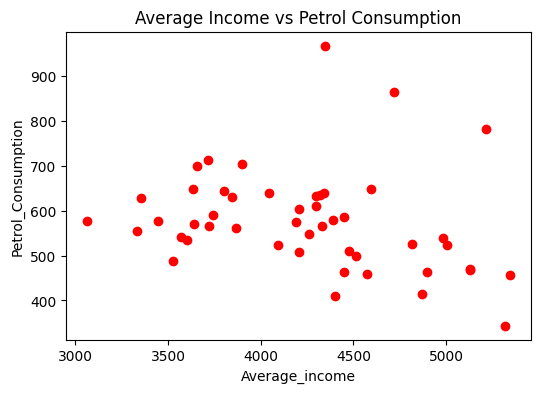

In [9]:
plt.figure (figsize = (6, 4))
plt.plot (df['Average_income'], df['Petrol_Consumption'], 'ro')
plt.title ('Average Income vs Petrol Consumption')
plt.xlabel ('Average_income')
plt.ylabel ('Petrol_Consumption')

plt.show()

# Training the Model

In [11]:
# Output
y = df['Petrol_Consumption']

# Input
x = df[['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_tax']]

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 42)

In [16]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit (x_train, y_train)

LinearRegression()

In [17]:
regressor.intercept_

361.45087906668397

In [18]:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

# Making Predictions

In [19]:
y_pred = regressor.predict (x_test)

In [20]:
results = pd.DataFrame ({'Actual': y_test, 'Predicted': y_pred})
print (results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


# Evaluating the Model

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error (y_test, y_pred)
MSE = mean_squared_error (y_test, y_pred)
RMSE = np.sqrt (MSE)

print (f'Mean Absolute Error: {MAE: .2f}')
print (f'Mean Squared Error: {MSE: .2f}')
print (f'Root Mean Squared Error: {RMSE: .2f}')

Mean Absolute Error:  53.47
Mean Squared Error:  4083.26
Root Mean Squared Error:  63.90


In [22]:
regressor.score (x_test, y_test)

0.39136640014305457

In [23]:
regressor.score (x_train, y_train)

0.7068781342155135

# Possible Improvements

*   Increase the size of the data set
*   Try non-linear relation
*   May require more features